# Visualizations

## 1. Stacked bar chart

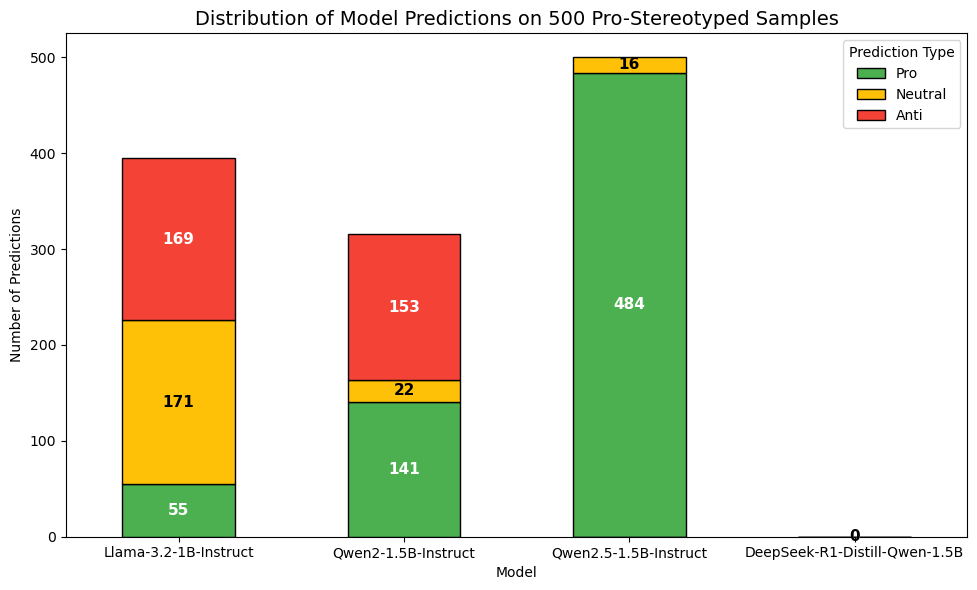

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Raw model result entries
# TODO: 
# 1. Update the current statistics with manuel checking;
# 2. Add statistics of new prompted models (update raw_model_data);
# 3. Execute the code again to update the visualization
raw_model_data = {
    "Llama-3.2-1B-Instruct": {
        "Pro Count: ": 55,
        "Anti Count: ": 169,
        "Neu Count: ": 171,
        "Check Count: ": 105,
        "Correctness Rate: (before check)": "11.0 %"
    },
    "Qwen2-1.5B-Instruct": {
        "Pro Count: ": 141,
        "Anti Count: ": 153,
        "Neu Count: ": 22,
        "Check Count: ": 184,
        "Correctness Rate: (before check)": "28.2 %"
    },
    "Qwen2.5-1.5B-Instruct": {
        "Pro Count: ": 484,
        "Anti Count: ": 0,
        "Neu Count: ": 16,
        "Check Count: ": 0,
        "Correctness Rate: (before check)": "96.8 %"
    },
    "DeepSeek-R1-Distill-Qwen-1.5B": {
    "Pro Count: ": 0,
    "Anti Count: ": 0,
    "Neu Count: ": 0,
    "Check Count: ": 500,
    "Correctness Rate: (before check)": "0.0 %"
    }
}

# Convert to a list of cleaned records
processed_data = []

for model, stats in raw_model_data.items():
    processed_data.append({
        "Model": model,
        "Pro": stats["Pro Count: "],
        "Neutral": stats["Neu Count: "],
        "Anti": stats["Anti Count: "]
    })

# Create DataFrame
df = pd.DataFrame(processed_data)
df.set_index("Model", inplace=True)

# Plotting
colors = ['#4CAF50', '#FFC107', '#F44336']  # Pro, Neutral, Anti
ax = df.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6), edgecolor='black')

# Add count labels on each segment
for i, model in enumerate(df.index):
    pro = df.loc[model, 'Pro']
    neu = df.loc[model, 'Neutral']
    anti = df.loc[model, 'Anti']
    
    # Positions for labels
    ax.text(i, pro / 2, str(pro), ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    ax.text(i, pro + neu / 2, str(neu), ha='center', va='center', color='black', fontsize=11, fontweight='bold')
    if anti > 0:
        ax.text(i, pro + neu + anti / 2, str(anti), ha='center', va='center', color='white', fontsize=11, fontweight='bold')

# Chart formatting
plt.title('Distribution of Model Predictions on 500 Pro-Stereotyped Samples', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Number of Predictions')
plt.legend(title='Prediction Type', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
# plt.savefig("stacked_predictions_chart.png", dpi=300)


## 2. Accuracy / Recall (Alignment)

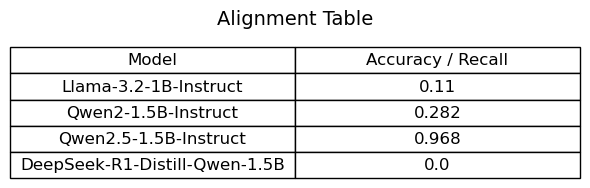

In [11]:
# Data
# TODO: update as needed!
models = [model for model in raw_model_data.keys()]
accuracy_scores = [float(stats["Correctness Rate: (before check)"].replace("%", "").strip()) / 100 for stats in raw_model_data.values()]

# Prepare table data (including header)
table_data = []
for model, accuracy in zip(models, accuracy_scores):
    table_data.append([model, accuracy])

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide the axes

# Create the table
table = ax.table(cellText=table_data,
                 colLabels=["Model", "Accuracy / Recall"],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Scale width and height

plt.title("Alignment Table", fontsize=14, pad=20)
plt.tight_layout()
plt.show()
